<a href="https://colab.research.google.com/github/id-shiv/project_notebooks/blob/master/%5BProject_001%5D_Machine_Learning_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept

**Traditional Method** 

```
Input Data + Hardcoded Rules -> Output
```

**Machine Learning**

```
Training   : Input Data     + Output       -> General Rule 
  
Prediction : New Input Data + General Rule -> Output (Predicted with Probability score)
```

# Example


* Input Data (Features) : Characteristics of the flower
> * Sepal Length
> * Sepal Width
> * Petal Length
> * Petal Width
* Output (Label) : Class of Iris flower
> * Versicolor
> * Setosa
> * Virginica

![](https://drive.google.com/uc?export=view&id=1XBfOJjt0tj7nQ0w3TdWhCwJRob2SMizy)

In [55]:
# Import Data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

# Expected Output
label = 'class'

# View Data
print(data.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [56]:
# Characteristics
print(f'Features : {features}')
print(f'Label : {label}')
print(f'Number of samples : {data.shape[0]}')
print(f'Classes : {np.unique(data[label])}')

Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Label : class
Number of samples : 150
Classes : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [57]:
# Samples
print(np.array(data.loc[data['class'] == 'Iris-setosa'].iloc[0]))
print(np.array(data.loc[data['class'] == 'Iris-versicolor'].iloc[0]))
print(np.array(data.loc[data['class'] == 'Iris-virginica'].iloc[0]))

[5.1 3.5 1.4 0.2 'Iris-setosa']
[7.0 3.2 4.7 1.4 'Iris-versicolor']
[6.3 3.3 6.0 2.5 'Iris-virginica']


# Terminologies

* Data Features : Attributes (Columns) of data that would used to determine the output.
* Data Samples (X) : Each row in the data, set of features associated to a specific category.
* Data Labels (y) : Output data to be predicted.
- Class : Categories within Data Label
* Data Characteristic : Univariate or Multivariate.
* Attribute Characteristics : Data type (Integer, String, Date, etc.).
* NaN : Missing values.



# Workflow

* Data
> * Import
> * (If applicable) Explore Data
> * Determine Problem
>> * Data analysis?
>> * Classification?
>> * Regression?
>> * Clustering?
> * Pre-Process Data
>> * Detect Features(X) and Labels (y)
>> * (If applicable) Handle Missing values (NaN)
>> * (If applicable) Remove 
>> * (If applicable) Augment Data
>>> * (If applicable) Add new \ Modify columns
>> * (If applicable) Handle Non-Numeric Data
* Model
> * Determine  
Based on Model
> * Create
> * Train
>> * Create Test and Train Data
> * Evaluate - Accuracy
> * (If applicable) Tune Model
> * (If applicable) Save
* Predict
> * (If applicable) Load Model
> * Predict

# Libraries

In [0]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import linear_model, preprocessing, svm
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale

import matplotlib.pyplot as pyplot
from matplotlib import style

import pickle

# Problem 1 - Regression with Linear Regression

Predict G3 based on given data for all the students

### Data

In [59]:
data_file = '/content/drive/My Drive/050 Colaboratory Notebooks/Datasets/student-mat.csv'
data = pd.read_csv(data_file, delimiter=';')
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [60]:
data = data[['G1', 'G2', 'G3', 'studytime', 'failures', 'absences']]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


## Pre-Process Data

### Create Features Vs Labels

Set the label (Category \ Classifier) feature of the data

In [0]:
label = 'G3'

Split Data into features (X) and labels (y)

In [0]:
X = data.drop([label], axis=1)
y = data[label]

## View Data

In [63]:
print(f'Number of Features : {len(X.columns)}')
print(f'Features : {list(X.columns)}')
print(f'Number of samples : {len(X)}')
print(f'Number of classes : {len(np.unique(y))}')

Number of Features : 5
Features : ['G1', 'G2', 'studytime', 'failures', 'absences']
Number of samples : 395
Number of classes : 18


## Split Train - Test

Split Data into test and training samples,  
This is to train the model with data different than that of what we would test the model with.

Generally test to training sample ratio would be 10 to 20%

Split the data as 4 arrays
* X_train will be used to train the model to predict y_train
* X_test will be used to test the prediction accuracy of the model against the actual y_test

In [64]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

355
355
40
40


## Linear Regression


* Features plotted with N-dimentions. 
```
N = Number of features
```
---
Best Fit Line
- Line that pierces through data points with minimum error
- Defined by equation (for 2 dimentional data) : y = mx + c
- m : slope of the line. Derived by taking 2 points in the slope and calculating it as: 
```
m = ( y2 - y1 ) / ( x2 - x1 )
```
- b : is called the y intercept. i.e point in y-axis where the best fit line intercepts.
---

- Linear Regression may be used when there is a strong corelation between the data points. i.e. farthest point has minimum error.



![](https://drive.google.com/uc?export=view&id=1g8dGt37SFkH6hxBB1WzPfJw5iq9h6P7U)

### Plot

Plot X vs Label to visualize the data points and correlation

Modify the x_label below to view correlation between different features and label

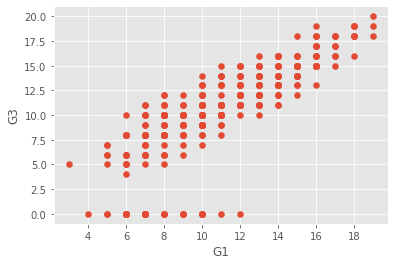

In [65]:
x_label = 'G1'
y_label = 'G3'

x_points = data[x_label]
y_points = data[y_label]

style.use('ggplot')
pyplot.scatter(x_points, y_points)
pyplot.xlabel(x_label)
pyplot.ylabel(y_label)

pyplot.show()

### Create Model

In [0]:
model = linear_model.LinearRegression()

## Train

In [67]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate

In [68]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.7268030027520924


## View

In [69]:
print(f'Co-efficient (m) : {model.coef_}')
print(f'Number of dimensions (N) : {len(model.coef_)}')
print(f'Y-intercept (b) : {model.intercept_}')

Co-efficient (m) : [ 0.14534432  0.96338672 -0.09238716 -0.27666457  0.02796052]
Number of dimensions (N) : 5
Y-intercept (b) : -1.3138444595755008


## Save

Save the model as a pickle to re-training everytime the model is used for prediction

In [0]:
with open('model.pickle', 'wb') as f:
  pickle.dump(model, f)

#### Save with best accuracy

Loop N times to fit the model and save the model with highest accuracy between iterations

Accuracy is different each time since split X-y is done randomly, i.e. training data may be different in each loop

In [71]:
best_accuracy = 0
least_accuracy = 100  # used only to see the difference in accuracy
number_of_iterations = 50

for _ in range(number_of_iterations):
  x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
  model = linear_model.LinearRegression()
  model.fit(x_train, y_train)
  accuracy = model.score(x_test, y_test)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    with open('model.pickle', 'wb') as f:
      pickle.dump(model, f)
  
  if accuracy < least_accuracy:
    least_accuracy = accuracy

print(f'Best Accuracy : {best_accuracy}')
print(f'Least Accuracy : {least_accuracy}')

Best Accuracy : 0.9459839025629155
Least Accuracy : 0.6762078076193332


## Load

Load the already trained model from the pickle file to be used for prediction

In [0]:
pickle_in = open('model.pickle', 'rb')
model = pickle.load(pickle_in)
pickle_in.close()

## Predict

In [73]:
predictions = model.predict(x_test)

# Predict for 5 samples from test data
for x in range(10):
  print(f'Input Data : {x_test.to_numpy()[x]}')
  print(f'Prediction : {int(round(predictions[x]))}')
  print(f'Actual : {y_test.to_numpy()[x]}')
  print('--------------\n')

Input Data : [6 8 1 1 0]
Prediction : 7
Actual : 8
--------------

Input Data : [13 14  3  0  4]
Prediction : 14
Actual : 14
--------------

Input Data : [10 10  2  0  0]
Prediction : 9
Actual : 10
--------------

Input Data : [12 11  1  0 16]
Prediction : 12
Actual : 11
--------------

Input Data : [10 13  4  0  6]
Prediction : 12
Actual : 13
--------------

Input Data : [ 8 10  1  0 12]
Prediction : 10
Actual : 10
--------------

Input Data : [19 19  4  0  4]
Prediction : 19
Actual : 20
--------------

Input Data : [11 12  1  0  2]
Prediction : 12
Actual : 11
--------------

Input Data : [10 13  2  1  6]
Prediction : 12
Actual : 13
--------------

Input Data : [17 16  2  0  0]
Prediction : 16
Actual : 16
--------------



# Problem 2 - Classification with K-Neighbors

## Data

In [74]:
data_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
data = pd.read_csv(data_file, names=['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
print(data.shape)

(1728, 7)


## Pre-Process Data

In [0]:
label = 'class'
features = ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety']
classes = np.unique(data[label])

### Create Features Vs Labels

Encode text to numeric data

In [0]:
encoder = preprocessing.LabelEncoder()

X = pd.DataFrame()
y = list(encoder.fit_transform(list(data[label])))

for feature in features:
  X[feature] = encoder.fit_transform(list(data[feature]))
X = X.to_numpy()

## View Data

In [77]:
print(f'Number of Features : {len(X[0])}')
print(f'Features : {features}')
print(f'Label : {label}')
print(f'Number of samples : {len(X)}')
print(f'Number of classes : {len(classes)}')
print(f'Classes : {classes}')

Number of Features : 6
Features : ['buying', 'maintenance', 'doors', 'persons', 'lug_boot', 'safety']
Label : class
Number of samples : 1728
Number of classes : 4
Classes : ['acc' 'good' 'unacc' 'vgood']


## Split Train - Test

In [78]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1555
1555
173
173


## K-Nearest Neighbor (KNN)

Introduction:
- Works on classification problem where
- data points are grouped into clusters of different class from input data.
- Attempts to classify given data point to one of the classes.
---
Concept :  

- K is a hyper parameter, is the number of closest neighboring data points that the algorithm would look for from the input data point.
- The identified K neighboring data points would then vote their class.
- More the votes from a particular class, input data point would be classified as belonging to that class
---
Best Practices : 
- Pick an odd number for K to have a decider vote in case of a tie
---
Math :  
- Find the magnitude (measured using Eucliedian Distance) of the line between input data point and trained data points
- For 2-dimentional data point:
```
Equlidian Distance (d) = Square_Root(square(x2 - x1) + square(y2 - y1))
```
- Pick K points who's magnitude is the highest

![](https://drive.google.com/uc?export=view&id=1N7pDWWPMjDDYqraE8Svjog3Vf5JOVfBH)

### Plot

Plot X vs Label to visualize the data points and correlation

Modify the x_label below to view correlation between different features and label

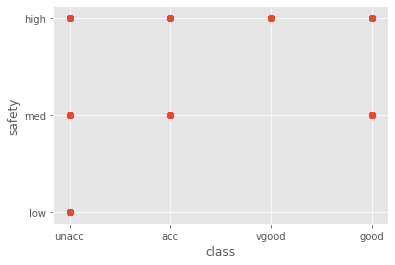

In [79]:
x_label = label
y_label = 'safety'

x_points = data[x_label]
y_points = data[y_label]

style.use('ggplot')
pyplot.scatter(x_points, y_points)
pyplot.xlabel(x_label)
pyplot.ylabel(y_label)

pyplot.show()

### Create Model

In [0]:
k = 7
model = KNeighborsClassifier(n_neighbors=k)

## Train

In [81]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## Evaluate

In [82]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.9595375722543352


## Predict

In [83]:
predictions = model.predict(x_test)

# Predict for 5 samples from test data
for x in range(10):
  print(f'Input Data : {x_test[x]}')
  print(f'Prediction : {int(round(predictions[x]))}')
  # print(f'Neighbors : {model.kneighbors([x_test[x]], n_neighbors=k, return_distance=True)}')
  print(f'Actual : {y_test[x]}')
  print('--------------\n')

Input Data : [2 3 3 0 2 1]
Prediction : 2
Actual : 2
--------------

Input Data : [3 2 3 1 2 2]
Prediction : 2
Actual : 2
--------------

Input Data : [1 1 2 2 2 1]
Prediction : 2
Actual : 2
--------------

Input Data : [2 2 2 1 0 2]
Prediction : 0
Actual : 0
--------------

Input Data : [3 2 3 2 0 1]
Prediction : 2
Actual : 2
--------------

Input Data : [3 0 1 0 2 0]
Prediction : 2
Actual : 2
--------------

Input Data : [2 2 2 1 1 1]
Prediction : 2
Actual : 2
--------------

Input Data : [1 1 2 1 1 0]
Prediction : 3
Actual : 3
--------------

Input Data : [0 1 0 0 2 0]
Prediction : 2
Actual : 2
--------------

Input Data : [1 1 0 2 1 1]
Prediction : 2
Actual : 2
--------------



# Problem 3 - Classification with SVM

## Support Vector Machines (SVM)

- Split clusters of data points by hyper-plane (*center line in below image*)
- Difference between the distance from hyper-plane to nearest data points (also called **Support Vectors**) in either clusters are very minimal or zero
- Number of hyper-planes may be number of clusters minus 1
---
How to choose hyper-plane?
- Margine has to be maximum
- What is Margin? it is area between two lines parallel to hyper-plane (*dotted lines in below image*) drawn on either side of the hyper-plane and seperating out the data points cluster

![](https://drive.google.com/uc?export=view&id=13txs1xAkJr7Dsp5XTyZsxmqwfNVAgikf)

**When hyper-plane cannot clearly distinguish the data points clusters?**

**Solution** : Converting N dimentional data point to N + 1 dimentional data point using Kernel

**Kernel** : is a function that takes a data point in N-dimensions to outputs N+1th co-ordinate of the data point

![](https://drive.google.com/uc?export=view&id=1zxssICVmwoJPh8UqrX1NxVQREpxLAo7V)

In [84]:
# Cancer data set from sklearn
data = datasets.load_breast_cancer()

X = data.data
y = data.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

class_names = ['malignant', 'benign']
classes = np.unique(y)

best_fit_kernel = ''
best_accuracy = 0
for kernel in ['rbf', 'linear', 'poly']:
  model = svm.SVC(kernel=kernel)
  model.fit(x_train, y_train)

  y_prediction = model.predict(x_test)

  accuracy = metrics.accuracy_score(y_test, y_prediction)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_fit_kernel = kernel
print(f'Best fit kernel is {best_fit_kernel} with accuracy {best_accuracy}')

Best fit kernel is linear with accuracy 0.9649122807017544


# Problem 4 - Clustering with K-Means

- K : # of clusters
- Centroid : X (in the image below) is the center point to the data point

![](https://drive.google.com/uc?export=view&id=1Cilzuyhl-AE_9Wlg6ERJwhP0_5B_4ALZ)

**Working**  
Start by placing K centroids randomly in the plot.
- Draw a line between the centroids
- Draw another line perpendicular to the above line at the center of above line
- Consider all data points inside of the line as associated to that centroid i.e. cluster
- Move the centroids to the center of the cluster by generation data point of centroid as average of all data points belonging to that centroid
- Repeat above above untill no changes in data points assignment to centroid. i.e. cluster

## Data

Load iris dataset from sklearn

In [0]:
data = load_iris()

# For computation reasons, scale features within the value -1 and 1
X = scale(data.data)
y = pd.DataFrame(data.target)

features = data.feature_names

k = 3

## Model

### Score

In [0]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

### Train

In [87]:
model = KMeans(n_clusters=k, init="random", n_init=10)
# bench_k_means(model, "1", data)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

### View

Text(0.5, 1.0, 'Predicted')

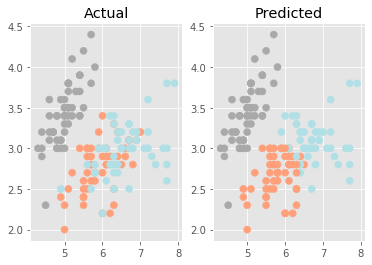

In [88]:
X_df = pd.DataFrame(data.data)
X_df.columns = features
y.columns = ['Type']

color_theme = np.array(['darkgrey', 'lightsalmon', 'powderblue'])

pyplot.subplot(1, 2, 1)
pyplot.scatter(x = X_df[X_df.columns[0]], 
               y = X_df[X_df.columns[1]],
               c=color_theme[data.target],
               s=50)
pyplot.title('Actual')

pyplot.subplot(1, 2, 2)
pyplot.scatter(x = X_df[X_df.columns[0]], 
               y = X_df[X_df.columns[1]],
               c=color_theme[model.labels_],
               s=50)
pyplot.title('Predicted')